In [6]:
from __future__ import division, print_function
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# change cwd based on OS # ToDO
import os
print(os.getcwd())
path = os.getcwd()

/Users/stefan/Code/nanodegree/p5/final_project


In [12]:
# load data
if path == "/Users/stefan/Code/nanodegree/p5/final_project":
    f = "./final_project_dataset.pkl"
else:
    f = "./final_project/final_project_dataset.pkl"
    
with open(f, "r") as data_file:
    data_dict = pickle.load(data_file)

# Remove TOTAL
data_dict.pop("TOTAL", 0)

TypeError: 'str' does not support the buffer interface

In [139]:
# extract features
from collections import defaultdict
features = defaultdict(list)

for k, v in data_dict.iteritems():
    for k2, v2 in v.iteritems():
        if v2 == "NaN":
            features[k2].append(None)
        else:
            features[k2].append(v2)

In [140]:
# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# load features into df
df = pd.DataFrame(features)
print df.shape
print df.dtypes

(145, 21)
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object


In [141]:
# drop email column
df.drop(["email_address"], axis=1, inplace=True)

In [142]:
for c in df.columns:
    print
    print df[c].describe()


count        81.00
mean    1201773.07
std     1441679.44
min       70000.00
25%      425000.00
50%      750000.00
75%     1200000.00
max     8000000.00
Name: bonus, dtype: float64

count        38.00
mean     841602.53
std     1289322.63
min     -102500.00
25%       79644.50
50%      221063.50
75%      867211.25
max     6426990.00
Name: deferral_payments, dtype: float64

count         48.00
mean     -581049.81
std       942076.40
min     -3504386.00
25%      -611209.25
50%      -151927.00
75%       -37926.00
max         -833.00
Name: deferred_income, dtype: float64

count       16.00
mean     89822.88
std      41112.70
min       3285.00
25%      83674.50
50%     106164.50
75%     112815.00
max     137864.00
Name: director_fees, dtype: float64

count        101.00
mean     2959559.26
std      5499449.60
min         3285.00
25%       506765.00
50%      1297049.00
75%      2542813.00
max     34348384.00
Name: exercised_stock_options, dtype: float64

count       94.00
mean     54192.01
st

In [144]:
# drop non-important columns
to_drop = ["deferral_payments", "deferred_income", "director_fees", 
           "loan_advances", "other", "restricted_stock_deferred",
          "to_messages", "from_messages"]
df_features = df.drop(to_drop, axis=1)
df_features.shape

In [148]:
df_features.describe()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,81.00,101.00,94.00,86.00,86.00,86.00,65.00,109.00,94.00,86.00,86.00,124.00,125.00
mean,1201773.07,2959559.26,54192.01,608.79,64.90,41.23,746491.20,1147424.09,284087.54,1176.47,2073.86,2623421.18,3352073.02
std,1441679.44,5499449.60,46108.38,1841.03,86.98,100.07,862917.42,2249770.36,177131.12,1178.32,2582.70,9488105.53,6532883.10
min,70000.00,3285.00,148.00,12.00,0.00,0.00,69223.00,-2604490.00,477.00,2.00,57.00,148.00,-44093.00
25%,425000.00,506765.00,22479.00,22.75,10.00,1.00,275000.00,252055.00,211802.00,249.75,541.25,386380.25,494136.00
50%,750000.00,1297049.00,46547.50,41.00,35.00,8.00,422158.00,441096.00,258741.00,740.50,1211.00,1100246.50,1095040.00
75%,1200000.00,2542813.00,78408.50,145.50,72.25,24.75,831809.00,985032.00,308606.50,1888.25,2634.75,2084662.75,2606763.00
max,8000000.00,34348384.00,228763.00,14368.00,528.00,609.00,5145434.00,14761694.00,1111258.00,5521.00,15149.00,103559793.00,49110078.00


In [149]:
df_features.corr()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.00,0.51,0.03,0.05,0.56,0.35,0.63,0.30,0.38,0.52,0.55,0.37,0.57,0.51
exercised_stock_options,0.51,1.00,0.02,-0.07,0.16,-0.03,0.50,0.50,0.69,0.61,0.15,0.08,0.59,0.96
expenses,0.03,0.02,1.00,0.09,-0.06,0.01,-0.10,0.06,0.04,0.15,0.22,0.16,0.11,0.03
from_messages,0.05,-0.07,0.09,1.00,0.19,0.59,-0.07,-0.07,0.00,-0.00,0.23,0.48,-0.03,-0.04
from_poi_to_this_person,0.56,0.16,-0.06,0.19,1.00,0.45,0.21,0.17,0.13,0.18,0.66,0.53,0.15,0.15
from_this_person_to_poi,0.35,-0.03,0.01,0.59,0.45,1.00,0.08,0.11,0.05,0.02,0.48,0.57,0.01,0.00
long_term_incentive,0.63,0.50,-0.10,-0.07,0.21,0.08,1.00,0.25,0.64,0.48,0.18,0.13,0.52,0.50
poi,0.30,0.50,0.06,-0.07,0.17,0.11,0.25,1.00,0.22,0.26,0.23,0.06,0.23,0.37
restricted_stock,0.38,0.69,0.04,0.00,0.13,0.05,0.64,0.22,1.00,0.55,0.23,0.20,0.60,0.86
salary,0.52,0.61,0.15,-0.00,0.18,0.02,0.48,0.26,0.55,1.00,0.28,0.19,0.58,0.61


Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


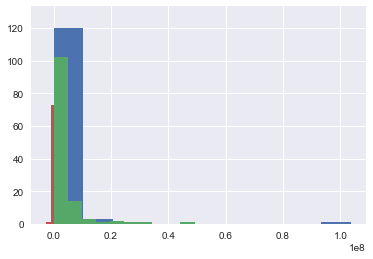

In [151]:
df_features.hist(bins=10, figsize=(96,96), xlabelsize=45, ylabelsize=45, xrot=40, layout=(6,2))